In [20]:
from gensim import models
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import decomposition
from sklearn import preprocessing

cbow_model = models.KeyedVectors.load_word2vec_format("../word_embedding/tunning/cbow.kv")
data = pd.DataFrame(cbow_model.vectors)
data.index = cbow_model.index_to_key 

X = data.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [22]:
tsne = TSNE(n_components=3) 
coord= tsne.fit_transform(X_scaled)
print(coord.shape)

/home/id1897/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(7231, 3)


<AxesSubplot:>

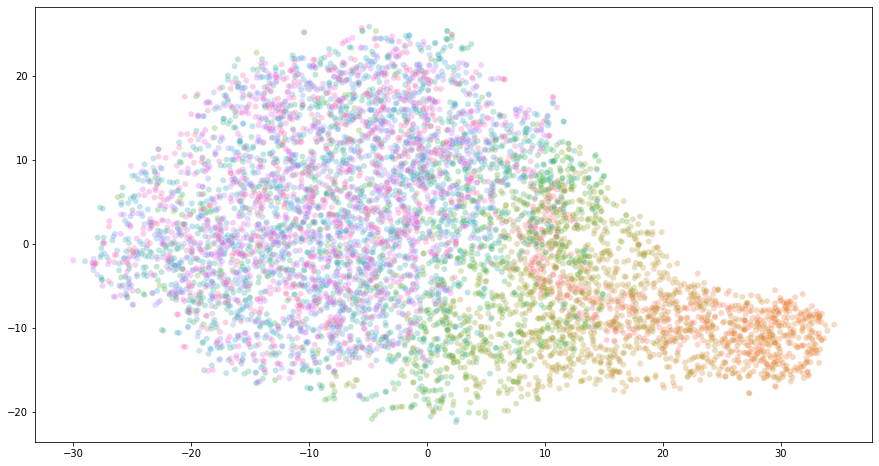

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    x=coord[:,0], y=coord[:,1],
    hue=data.index,
    data=data,
    legend=False,
    alpha=0.3
)